# Assignment 3

CS529

Adrien Clay

Christopher Jarek

Thomas Hynes

Refat Mishuk

In [48]:
import pandas as pd
import idx2numpy
from sklearn.metrics import confusion_matrix, classification_report
import pickle
import matplotlib.pyplot as plt

In [49]:
def load_model(filename):
    '''
    Loads a model from a pickle file given the filename
    '''
    clf = None
    with open(filename, 'rb') as f:
        clf = pickle.load(f)
        f.close()
    return clf

In [50]:
mnist_test_images = idx2numpy.convert_from_file('./mnist/t10k-images-idx3-ubyte')
mnist_test_labels = idx2numpy.convert_from_file('./mnist/t10k-labels-idx1-ubyte')
mnist_test_images = mnist_test_images.reshape(mnist_test_images.shape[0], -1)

fash_test_images = idx2numpy.convert_from_file('./fashion/t10k-images-idx3-ubyte')
fash_test_labels = idx2numpy.convert_from_file('./fashion/t10k-labels-idx1-ubyte')
fash_test_images = fash_test_images.reshape(fash_test_images.shape[0], -1)


# 1. Implementation

For our implementation, due to computer limitations we were able to train 10,000 images on each kernel at each dimensionality reduction point (50, 100, 200). We were only able to implement approximately 4 values per hyperparameter at 3 folds each.

The general process for the training loop, found in `train_loop.py` is as follows:

1. For each kernel
    - For each option for number of components:
        - Instantiate a pipeline with a standard scaler object, PCA object, and finally the support vector machine.
        - Provide the PCA object the number of components to use
        - Provide the support vector machine the kernel to use
        - Insantiate `GridSearchCV` with the appropriate param grid for the training loop in question (eg. only provide the hyperparameters that each kernel acknowledges)
        - Collect the best hyper parameters and scores from the resulting estimators and record them
        - Test the best estimator on the test images and record this score separately
        - Output CSV's of the results with the appropriate settings for these models

### Train Loop Usage:

1. Directory structure must match the following:
```
.
|-- mnist/
|   |-- t10k-images-idx3-ubyte
|   |-- t10k-labels-idx1-ubyte
|   |-- train-images-idx3-ubyte
|   `-- train-labels-idx1-ubyte
|-- fashion/
|   |-- t10k-images-idx3-ubyte
|   |-- t10k-labels-idx1-ubyte
|   |-- train-images-idx3-ubyte
|   `-- train-labels-idx1-ubyte
`-- train_loop.py
```

2. Call `python ./train_loop.py`

3. Enter the number of samples to train on. We used 10,000.

4. The model results will be saved as pickle files in `./models`, a newly created folder.

## Best Model Settings

The search space for the models was defined as follows:

1. Linear Kernel:
    - C parameter: [.001, .01, .1, 1]
2. RBF Kernel:
    - C parameter: [.001, .01, .1, 1]
    - Gamma parameter: [.0001, .001, .01, .1]
3. Poly Kernel:
    - C parameter: [.001, .01, .1, 1]
    - Gamma Parameter: [.0001, .001, .01, .1]
    - Degree Parameter: [1,2,3,4]

The reason for our constraint was due to number of fits required by each step in the Grid Search. For example, the number of fits if we had used 8 hyperparamters and five folds for the polynomial kernel would have result in:

$$
8^3 * 5 = 2560
$$
<center>
That is, 2560 fits on 60,000 images, doubled since there are two datasets.
</center>

In order to satisfy computer constraints, we used 10,000 images with four hyperparameters each, trained on 3 folds, so `cv=3`.

In [51]:
mnist = pd.read_csv('minst_train_result.csv')
mnist_fash = pd.read_csv('mnist_fashion_train_result.csv')
mnist.drop('Unnamed: 0', inplace=True, axis=1)
mnist_fash.drop('Unnamed: 0', inplace=True, axis=1)

In [52]:
print("Best Model Settings for MNIST: ")
print(mnist[mnist.accuracy == mnist.accuracy.max()])
print()
print("Best Model Settings for MNIST Fashion")
print(mnist_fash[mnist_fash.accuracy == mnist_fash.accuracy.max()])

Best Model Settings for MNIST: 
   n_components kernel  best_c  best_degree  best_gamma  best_score  accuracy
8           200   poly   0.001          3.0         0.1      0.9512    0.9583

Best Model Settings for MNIST Fashion
   n_components kernel  best_c  best_degree  best_gamma  best_score  accuracy
8           200   poly     0.1          2.0        0.01    0.863701    0.8601


#### Results:

From the above output we can see that the best results were both from the `poly` kernel with 200 components used in the PCA reduction.

1. For MNIST:
    - Components: 100
    - C: 1.0
    - Degree: 3.0
    - Gamma: 0.01
    - Resulting Accuracy: ~95%

2. For MNIST Fashion:
    - Components: 200
    - C: .1
    - Degree: 2.0
    - Gamma: .01
    - Resulting Accuracy: ~86%

Overall, these are pretty decent scores for the dataset considering only 1/6 of the images were used.

## Table Comparisons

Below are the two tables for MNIST and MNIST fashion respectively.

In general, the scores are lower for the MNIST Fashion set, but are overall acceptably high.

Although the best_score column for mnist goes to the poly kernel with 100 components, the highest accuracy in testing went to 200 components in the poly kernel, so we have used this for demonstration going forward.

The performance of the kernels in both datasets seem to follow a similar pattern, that is, as the number of components increases, the score/accuracy also increase. Incidentally, the way the below tables are structure further demonstrates this pattern as we can see an increase in accuracy as we move from linear to rbf, and finally to poly, with poly being the most well performing kernel amongst all three kernels, and 200 components being the highest performing number of components of the available options 50, 100 and 200.

Because of the differences in kernels, we can most likely conclude that the poly kernel does so well because the datasets benefit from the polynomial nature of the 'poly' kernel, such that non-linear decision boundaries are causing accuracy to increase. Although the linear kernel performs acceptably high, it is clear that the polynomial space provided by the 'poly` kernel is of benefit.

In [53]:
mnist

,n_components,kernel,best_c,best_degree,best_gamma,best_score,accuracy
0,50,linear,0.010,NaN,NaN,0.9186,0.9201
1,100,linear,0.010,NaN,NaN,0.9230,0.9250
2,200,linear,0.010,NaN,NaN,0.9252,0.9311
3,50,rbf,1.000,NaN,0.001,0.9325,0.9366
4,100,rbf,1.000,NaN,0.001,0.9345,0.9411
5,200,rbf,1.000,NaN,0.001,0.9334,0.9421
6,50,poly,0.100,3.0,0.010,0.9444,0.9506
7,100,poly,1.000,3.0,0.010,0.9517,0.9543
8,200,poly,0.001,3.0,0.100,0.9512,0.9583


In [54]:
mnist_fash

,n_components,kernel,best_c,best_degree,best_gamma,best_score,accuracy
0,50,linear,0.010,NaN,NaN,0.835600,0.8245
1,100,linear,0.010,NaN,NaN,0.845400,0.8397
2,200,linear,0.010,NaN,NaN,0.844000,0.8407
3,50,rbf,1.000,NaN,0.001,0.839600,0.8376
4,100,rbf,1.000,NaN,0.001,0.846600,0.8455
5,200,rbf,1.000,NaN,0.001,0.851100,0.8503
6,50,poly,0.010,2.0,0.100,0.857500,0.8489
7,100,poly,0.001,2.0,0.100,0.863501,0.8565
8,200,poly,0.100,2.0,0.010,0.863701,0.8601


## Model Results & Confusion Matrices

Below are the results of the models using the test images from each dataset to reproduce the prediction results obtained from the grid search.

### MNIST Dataset

In [55]:
mnist_best = load_model('./models/MNIST_poly_n_200.pkl')
preds = mnist_best.predict(mnist_test_images)

In [56]:
print("Confusion Matrix")
print()
print(confusion_matrix(mnist_test_labels, preds))
print()
print("Classification Report")
print(classification_report(mnist_test_labels, preds))

Confusion Matrix

[[ 962    0    5    2    0    1    5    1    4    0]
 [   0 1124    2    2    1    1    4    0    1    0]
 [   5    1  982    5    6    1    4    6   20    2]
 [   0    0   10  966    3    7    0    5   17    2]
 [   0    2    6    2  952    1    3    3    4    9]
 [   5    0    3   14    3  836    5    0   22    4]
 [   5    3    6    1   10    8  919    0    6    0]
 [   1    6   13    2   11    0    0  973    4   18]
 [   5    1    8    6    8   13    1    3  925    4]
 [   5    3    1    6   22    5    0    7   16  944]]

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.95      0.95      0.95      1032
           3       0.96      0.96      0.96      1010
           4       0.94      0.97      0.95       982
           5       0.96      0.94      0.95       892
           6       0.98      0.96      0.97      

### Interpretation

We can see from the confusion matrix that the model scores a high number of true-positives. This is further confirmed by the precision and recall scores from the classification report.

In general, the data is highly classifiable in that the model is having an easy time distinguishing classes with low ambiguity between classes.

### MNIST Fashion

In [57]:
m_fashion_best = load_model('./models/MNIST_FASH_poly_n_200.pkl')
preds = m_fashion_best.predict(fash_test_images)
print("Confusion Matrix")
print()
print(confusion_matrix(fash_test_labels, preds))

Confusion Matrix

[[791   2  20  40   2   0 135   1   9   0]
 [  3 955   7  27   5   0   3   0   0   0]
 [ 12   3 782  17 106   0  75   2   3   0]
 [ 24   4  14 890  27   0  39   0   2   0]
 [  1   0 111  33 766   1  84   1   3   0]
 [  0   0   1   2   0 921   2  48   2  24]
 [118   1 105  39  76   0 647   0  14   0]
 [  0   0   0   0   0  17   0 960   0  23]
 [  1   1   8  10   6   7  17   5 945   0]
 [  0   1   0   1   0  10   0  43   1 944]]


In [58]:
print("Classification Report")
print(classification_report(fash_test_labels, preds))

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1000
           1       0.99      0.95      0.97      1000
           2       0.75      0.78      0.76      1000
           3       0.84      0.89      0.86      1000
           4       0.78      0.77      0.77      1000
           5       0.96      0.92      0.94      1000
           6       0.65      0.65      0.65      1000
           7       0.91      0.96      0.93      1000
           8       0.97      0.94      0.96      1000
           9       0.95      0.94      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



### Interpretation

Similarly to the MNIST dataset, the confusion matrix and classification report for the dataset implies a higher level of classifiability, in that the features are easy enough to distinguish with a low level ambiguity. The strong diagonal in the confusion matrix implies a high level of true positives.

However, in the MNIST Fashion dataset we can see that the model has some difficulty distinguishing classes 2, 4 and 6 specifically.

In the below figure, we compare the images from classes zero and one to the images from classes two, four, and six. We can see it might be the case that the model has trouble distinguishing shirt-like objects with longer sleeves. It's relatively clear why it might not have a difficult time distinguishing the pair of pants from class one, however.

Text(0.5, 1.0, '6')

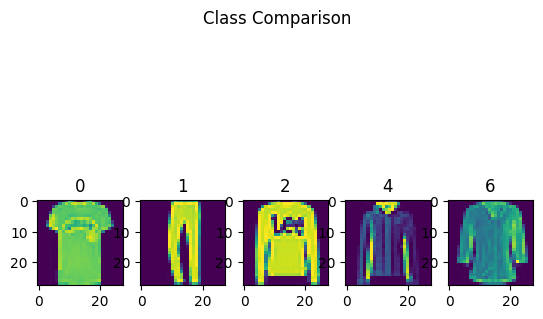

In [59]:
fash_normal = idx2numpy.convert_from_file('./fashion/t10k-images-idx3-ubyte')
class_0 = [i for i in range(len(fash_test_labels)) if fash_test_labels[i] == 0][0]
class_1 = [i for i in range(len(fash_test_labels)) if fash_test_labels[i] == 1][0]
class_2 = [i for i in range(len(fash_test_labels)) if fash_test_labels[i] == 2][0]
class_4 = [i for i in range(len(fash_test_labels)) if fash_test_labels[i] == 4][0]
class_6 = [i for i in range(len(fash_test_labels)) if fash_test_labels[i] == 6][0]
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5)
fig.suptitle("Class Comparison")
ax1.imshow(fash_normal[class_0])
ax1.set_title("0")
ax2.imshow(fash_normal[class_1])
ax2.set_title("1")
ax3.imshow(fash_normal[class_2])
ax3.set_title("2")
ax4.imshow(fash_normal[class_4])
ax4.set_title("4")
ax5.imshow(fash_normal[class_6])
ax5.set_title("6")

### Per Announcment:

>In Task 3.2, you are required to use PCA and LDA to find the principal components of the numbers k = 50, 100 and 200. Theoretically, you may choose any k which is less than the number of original features using Fisher's algorithm presented in our slides and textbook. However, the scikit-learn class LinearDiscriminantAnalysis bounds the value of k by L-1 where L is the number of classes.

 

> 1. Why scikit-learn does so?

> 2. Usually considering less than L - 1 features may lead to a very bad accuracy. Then, how can we come up with a learning framework to consider more than L - 1 meaningful principle components (reduced features) using LDA?

> 3. How can we get rid of any upper limit (less than the number of original features) of the number of meaningful principle components?

1. Scikit-learn imposes this restriction because of the way separating hyperplanes are found between classes. For example, when you separate two classes, you can find one hyperplane, so one discriminant function is enough. To separate more than one for $L$ classes, $L-1$ discriminant functions will be enough.

    See [Discriminant Functions][discrminant_functions]
2. Potentially, one could utilize LDA for more features if you applied PCA first, followed by LDA. PCA will assist with noise reduction and preservation of important information, while LDA will maximize the class separation. This is sort of a roundabout way of allowing 'more' classis into the Linear Discriminant Analysis, as you will preserve important information via PCA, allowing you to include 'more' in the LDA in a very indirect way.

3. Similarly to answer 2, you might be able to get rid of any upper limit by reducing the number of features with PCA initially, allowing you to fit 'more' in the LDA without a class limit. Alternatively, one could potentially use feature extraction to extract more features, allowing you to increase `n_components` in LDA according to the number of new features.

[discrminant_functions]: https://en.wikipedia.org/wiki/Linear_discriminant_analysis#Discriminant_functions